In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

In [3]:
defualt_path = ''
dataset_name = 'rsna-bone-age'
data_file = Path(defualt_path, f'{dataset_name}/boneage-training-dataset.csv')
df = pd.read_csv(data_file)
df

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False
...,...,...,...
12606,15605,50,False
12607,15606,113,False
12608,15608,55,False
12609,15609,150,True


In [4]:
def min_max_normal(ba_minmax):
    a_min, a_max = ba_minmax.min(), ba_minmax.max()
    ba_minmax -= a_min
    ba_minmax /= a_max
    return ba_minmax, a_min, a_max

df['ba_minmax'], a_min, a_max = min_max_normal(df['boneage'].copy())
df['boneage_category'] = pd.cut(df['boneage'], 10)

In [5]:
fig = px.histogram(df['boneage'], x="boneage")
fig.update_xaxes(tickvals=[0, 60, 120, 180, 229])
fig.show()

In [6]:
fig = px.histogram(df['ba_minmax'], x="ba_minmax", )

fig.show()

In [7]:
fig = px.histogram(df['boneage_category'])
fig.show()

TypeError: Object of type Interval is not JSON serializable

array([[<AxesSubplot:title={'center':'boneage'}>]], dtype=object)

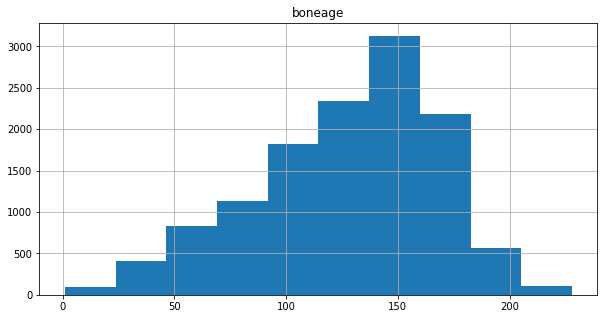

In [ ]:
df[['boneage']].hist(figsize = (10, 5))

id                  801
boneage             801
male                801
ba_minmax           801
boneage_category    801
dtype: int64

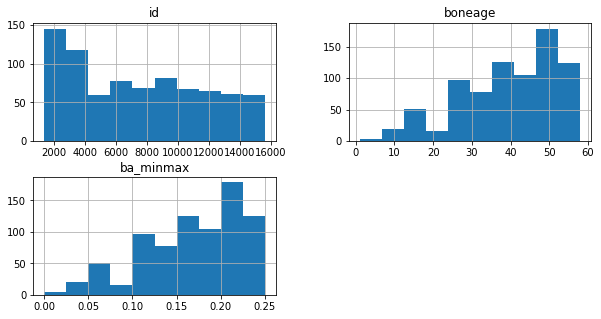

In [ ]:
df[df['boneage'] < 60].hist(figsize = (10, 5))
df[df['boneage'] < 60].count()

In [ ]:
print(df[(df['boneage'] >= 0) & (df['boneage'] < 60)]['boneage'].count())
print(df[(df['boneage'] >= 60) & (df['boneage'] < 120)]['boneage'].count())
print(df[(df['boneage'] >= 120) & (df['boneage'] < 180)]['boneage'].count())
print(df[(df['boneage'] >= 180) & (df['boneage'] < 229)]['boneage'].count())


801
3487
7224
1099


In [ ]:
print(df[(df['boneage'] >= 0) & (df['boneage'] < 84)]['boneage'].count())
print(df[(df['boneage'] >= 84) & (df['boneage'] < 168)]['boneage'].count())
print(df[(df['boneage'] >= 168) & (df['boneage'] < 229)]['boneage'].count())


2071
8439
2101


In [8]:
print(df[(df['boneage'] >= 0) & (df['boneage'] < 84)]['boneage'].count())
print(df[(df['boneage'] >= 84) & (df['boneage'] < 156)]['boneage'].count())
print(df[(df['boneage'] >= 156) & (df['boneage'] < 229)]['boneage'].count())


2071
6492
4048


In [ ]:
df[(df['boneage'] >= 0) & (df['boneage'] < 84)]

,id,boneage,male,ba_minmax,boneage_category
1,1378,12,False,0.048246,"(0.773, 23.7]"
4,1381,82,False,0.355263,"(69.1, 91.8]"
8,1385,36,True,0.153509,"(23.7, 46.4]"
15,1394,57,True,0.245614,"(46.4, 69.1]"
18,1398,4,False,0.013158,"(0.773, 23.7]"
...,...,...,...,...,...
12598,15596,72,True,0.311404,"(69.1, 91.8]"
12601,15599,36,True,0.153509,"(23.7, 46.4]"
12603,15602,82,False,0.355263,"(69.1, 91.8]"
12606,15605,50,False,0.214912,"(46.4, 69.1]"
